# Basic Usage

This page assumes a successful [installation](install.html) of NQontrol and all dependencies.

## Hello Servo Example

Here is a minimalistic, `hello world`-like example to show, how to control a servo using the python terminal or a little script.

In [12]:
# Importing a ServoDevice is enough
from nqontrol import ServoDevice

# Create a new servo device object, connecting to adwin with the device number 1.
sd = ServoDevice(0)

# Print the timestamp
print('Uptime {}s'.format(sd.timestamp))

# Get a servo object to control it.
s = sd.servo(1)

# enable in and output
s.inputSw = True
s.outputSw = True

Uptime 0s


Using a signal generator for the input you will now get the same signal on the output.
(That is true for signals below about 15 kHz.)

## Apply a ServoDesign

To use a servo for a real control loop we want to have some filters.
The full documentation is in the [OpenQlab docs](https://las-nq-serv.physnet.uni-hamburg.de/python/openqlab/servodesign.html).

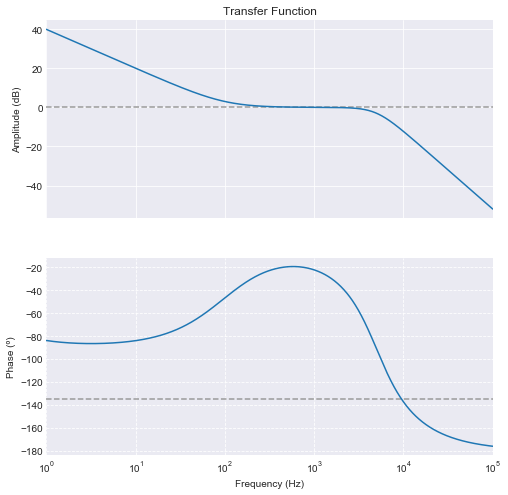

In [13]:
# Add an integrator and a lowpass
s.servoDesign.integrator(1e2)
s.servoDesign.lowpass(5e3)

# Plot how it looks analytically
import matplotlib.pyplot as plt
design.plot()
plt.show()

In [15]:
# Apply it to our servo
s.applyServoDesign()

# Control, what happens with the servo
s.filters

[[1.0015692243574656, -0.9999968584122811, 0.0, -0.9968633318334381, 0.0],
 [0.005519854739225482, -1.7786050226116845, 0.8007755579457131, 2.0, 1.0],
 [1.0, 0, 0, 0, 0],
 [1.0, 0, 0, 0, 0],
 [1.0, 0, 0, 0, 0]]

In [16]:
print(s.filterStates)
print(s.gain)

[True, True, False, False, False]
1.0


## Control Filters

In [18]:
# Disable all filters
s.filterStates = [False] * 5

# Enable the second (index = 1) filter
s.filterState(1, True)

## Enable a Ramp

In [22]:
# Choose a slow ramp with a frequency of 1 Hz.
# Amplitude = 4
s.enableRamp(20, 4)

## Start Realtime Plotting

In [ ]:
# Start plotting in a background process
s.realtimePlot(multiprocessing=True)

# disable plotting the output
s.realtime['ydata'] = ['input', 'aux']

# set constant y limit from -3 to 5 
s.realtime['ylim'] = (-3, 5)

# stop realtime plotting
s.stopRealtimePlot()